In [1]:
# import packages
import requests
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from fuzzywuzzy import fuzz
import s3fs

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# import original tweet data
file1 = open("TwitterData.txt", "r")
textfile = file1.read()
tweets = textfile.splitlines()
while("" in tweets) :
    tweets.remove("")
while(" " in tweets) :
    tweets.remove(" ")

In [3]:
def slang(tweets):
    # List to save slang percentage of each tweet
    slangPerc = []
    # LINUX kernel English dictionary
    file = open("/usr/share/dict/words", "r")
    # list of words in English dictionary
    words = re.sub("[^\w]", " ",  file.read()).split()
    # Compares words in tweet to English dictionary to identify slang
    for i in range(len(tweets)):
        # count slang words in tweet
        count = 0
        # list of words in the tweet
        tweetWords = tweets[i].split()
        if len(tweetWords) != 0:
            # iterate through list to compare each word to English dictionary to check for slang
            for j in range(len(tweetWords)):
                word = tweetWords[j]
                if word.strip().lower() in words:
                    continue
                else:
                    count += 1
            slangPerc.append(count/len(tweetWords))
    return slangPerc

In [4]:
# store list of slang percentage of original tweets in a list called sp
sp = slang(tweets)

In [5]:
fs = s3fs.S3FileSystem()

In [6]:
fileZh = fs.open('s3://qtm350twitterproject/languagetoenglish/en.zh.TwitterData.txt','rb')
textfile = fileZh.read()
translatedTweetsZh = textfile.splitlines()
for i in range(len(translatedTweetsZh)):
    translatedTweetsZh[i] = translatedTweetsZh[i].decode('UTF-8')
while("" in translatedTweetsZh) :
    translatedTweetsZh.remove("")

In [7]:
fileRu = fs.open('s3://qtm350twitterproject/languagetoenglish/en.ru.TwitterData.txt','rb')
textfile = fileRu.read()
translatedTweetsRu = textfile.splitlines()
for i in range(len(translatedTweetsRu)):
    translatedTweetsRu[i] = translatedTweetsRu[i].decode('UTF-8')
while("" in translatedTweetsRu) :
    translatedTweetsRu.remove("")

In [8]:
fileEs = fs.open('s3://qtm350twitterproject/languagetoenglish/en.es.TwitterData.txt','rb')
textfile = fileEs.read()
translatedTweetsEs = textfile.splitlines()
for i in range(len(translatedTweetsEs)):
    translatedTweetsEs[i] = translatedTweetsEs[i].decode('UTF-8')
while("" in translatedTweetsEs) :
    translatedTweetsEs.remove("")

In [9]:
def match(tweets, translatedTweets):
    # List to save match percentage of each tweet
    matchPerc = []
    # Compares words in re-translated tweet to original tweet
    for i in range(len(translatedTweets)):
        try:
            p = fuzz.token_set_ratio(translatedTweets[i],tweets[i])
        except:
            p = 0
        matchPerc.append(p)
    return matchPerc

In [10]:
mpZh = match(tweets, translatedTweetsZh)

In [11]:
mpRu = match(tweets, translatedTweetsRu)

In [12]:
mpEs = match(tweets, translatedTweetsEs)

In [13]:
# Create dataframe of slang percentage and match percentage for each tweet in Chinese
dfZh = pd.DataFrame(list(zip(sp, mpZh)), columns =['Slang_Percentage', 'Match_Percentage'])

In [14]:
# Create dataframe of slang percentage and match percentage for each tweet in Russian
dfRu = pd.DataFrame(list(zip(sp, mpRu)), columns =['Slang_Percentage', 'Match_Percentage'])

In [15]:
# Create dataframe of slang percentage and match percentage for each tweet in Spanish
dfEs = pd.DataFrame(list(zip(sp, mpEs)), columns =['Slang_Percentage', 'Match_Percentage'])

Text(0.5, 1.0, 'Distribution of Match Percentage')

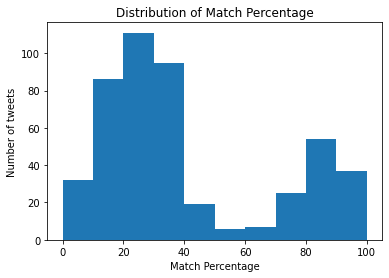

In [16]:
# Histogram to visualise distribution of match percentage data with Chinese translation
plt.hist(dfZh['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage')

Text(0.5, 1.0, 'Distribution of Match Percentage')

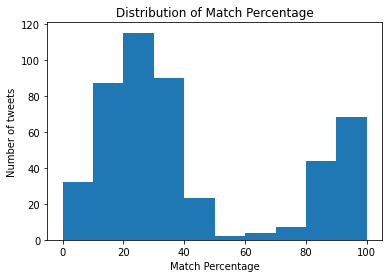

In [17]:
# Histogram to visualise distribution of match percentage data with Russian translation
plt.hist(dfRu['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage')

Text(0.5, 1.0, 'Distribution of Match Percentage')

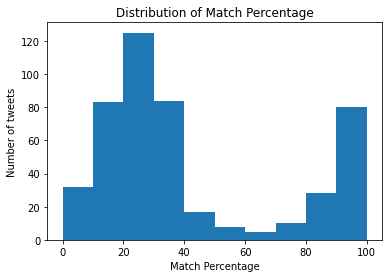

In [18]:
# Histogram to visualise distribution of match percentage data with Spanish translation
plt.hist(dfEs['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage')

Text(0.5, 1.0, 'Distribution of Slang Percentage')

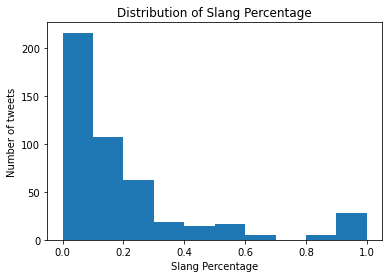

In [20]:
# Histogram to visualise distribution of slang percentage data
plt.hist(dfZh['Slang_Percentage'])
plt.xlabel('Slang Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Slang Percentage')

Text(0, 0.5, 'Match Percentage')

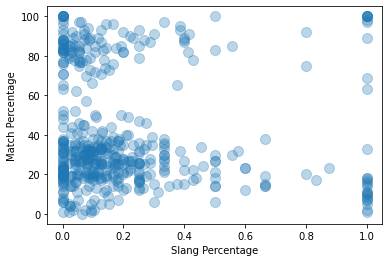

In [21]:
# Plot of match percentage against slang percentage for the Chinese data set
plt.plot(dfZh['Slang_Percentage'], dfZh['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

Text(0, 0.5, 'Match Percentage')

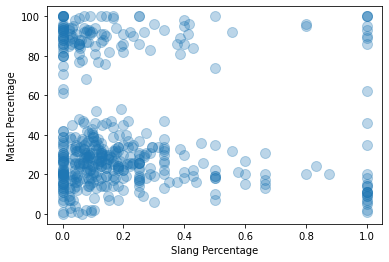

In [22]:
# Plot of match percentage against slang percentage for the Russian data set
plt.plot(dfRu['Slang_Percentage'], dfRu['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

Text(0, 0.5, 'Match Percentage')

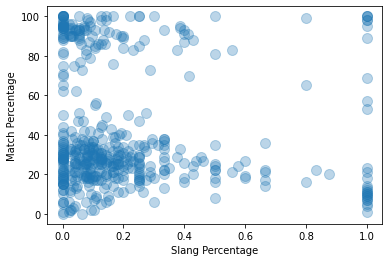

In [23]:
# Plot of match percentage against slang percentage for the Spanish data set
plt.plot(dfEs['Slang_Percentage'], dfEs['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

In [24]:
# Correlation between slang percentage and match percentage in our Chinese data set
dfZh.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,-0.052051
Match_Percentage,-0.052051,1.000000


In [25]:
# Correlation between slang percentage and match percentage in our Russian data set
dfRu.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,-0.066153
Match_Percentage,-0.066153,1.000000


In [26]:
# Correlation between slang percentage and match percentage in our Spanish data set
dfEs.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,-0.084359
Match_Percentage,-0.084359,1.000000


In [27]:
# OLS regression of match percentage on slang percentage for the Chinese data
resultsZh = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfZh).fit()

In [28]:
# Results of OLS regression for Chinese data
resultsZh.params

Intercept           41.493835
Slang_Percentage    -5.861013
dtype: float64

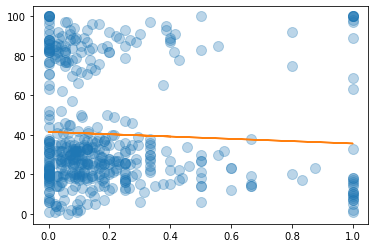

In [29]:
# Plot of data with OLS regression line imposed on top for Chinese data
plt.plot(dfZh['Slang_Percentage'], dfZh['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfZh['Slang_Percentage'], resultsZh.predict(dfZh['Slang_Percentage']))

In [30]:
# OLS regression of match percentage on slang percentage for the Russian data
resultsRu = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfRu).fit()

In [31]:
# Results of OLS regression for Russian data
resultsRu.params

Intercept           42.804845
Slang_Percentage    -7.879558
dtype: float64

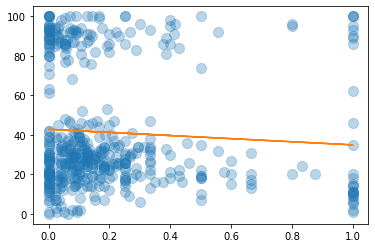

In [32]:
# Plot of data with OLS regression line imposed on top for Russian data
plt.plot(dfRu['Slang_Percentage'], dfRu['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfRu['Slang_Percentage'], resultsRu.predict(dfRu['Slang_Percentage']))

In [33]:
# OLS regression of match percentage on slang percentage for the Spanish data
resultsEs = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfEs).fit()

In [34]:
# Results of OLS regression for Spanish data
resultsEs.params

Intercept           43.629823
Slang_Percentage   -10.149023
dtype: float64

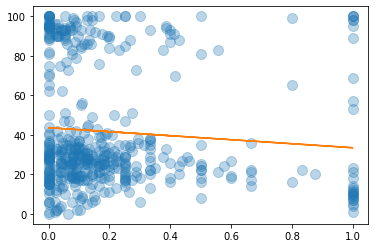

In [35]:
# Plot of data with OLS regression line imposed on top for Spanish data
plt.plot(dfEs['Slang_Percentage'], dfEs['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfEs['Slang_Percentage'], resultsEs.predict(dfEs['Slang_Percentage']))

Looking at our results, it appears that for all of our data sets there are two clusters of data, one which appears to follow the trend we expected of a decreasing match percentage with an increase in slang percentage, and one which appears to have a high match percentage regardless of the slang percentage of the original tweet. To investgate this further, we will filter by match percentage, seperating the results for under and over 50% match.

Firstly, looking at the Chinese translation data:

Text(0.5, 1.0, 'Low Match Percentage')

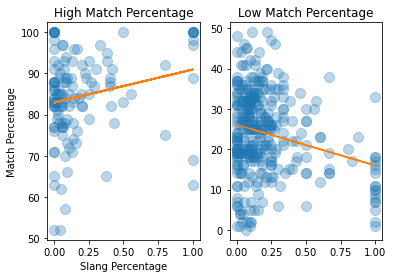

In [54]:
dfZhH = dfZh[dfZh['Match_Percentage'] > 50]
resultsZhH = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfZhH).fit()
# Plot of data with high match scores for Chinese data
plt.subplot(1, 2, 1)
plt.plot(dfZhH['Slang_Percentage'], dfZhH['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfZhH['Slang_Percentage'], resultsZhH.predict(dfZhH['Slang_Percentage']))
plt.title('High Match Percentage')
plt.ylabel('Match Percentage')
plt.xlabel('Slang Percentage')

dfZhL = dfZh[dfZh['Match_Percentage'] < 50]
resultsZhL = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfZhL).fit()
# Plot of data with low match scores for Chinese data
plt.subplot(1, 2, 2)
plt.plot(dfZhL['Slang_Percentage'], dfZhL['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfZhL['Slang_Percentage'], resultsZhL.predict(dfZhL['Slang_Percentage']))
plt.title('Low Match Percentage')

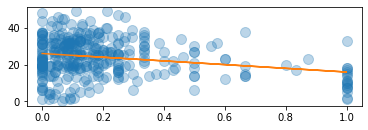

In [47]:
dfZhL = dfZh[dfZh['Match_Percentage'] < 50]
resultsZhL = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfZhL).fit()
# Plot of data with OLS regression line imposed on top for Chinese data
plt.subplot(2, 1, 2)
plt.plot(dfZhL['Slang_Percentage'], dfZhL['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfZhL['Slang_Percentage'], resultsZhL.predict(dfZhL['Slang_Percentage']))

Looking at the above two plot